Cross-validation: evaluating estimator performance

overfitting

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. 

To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.

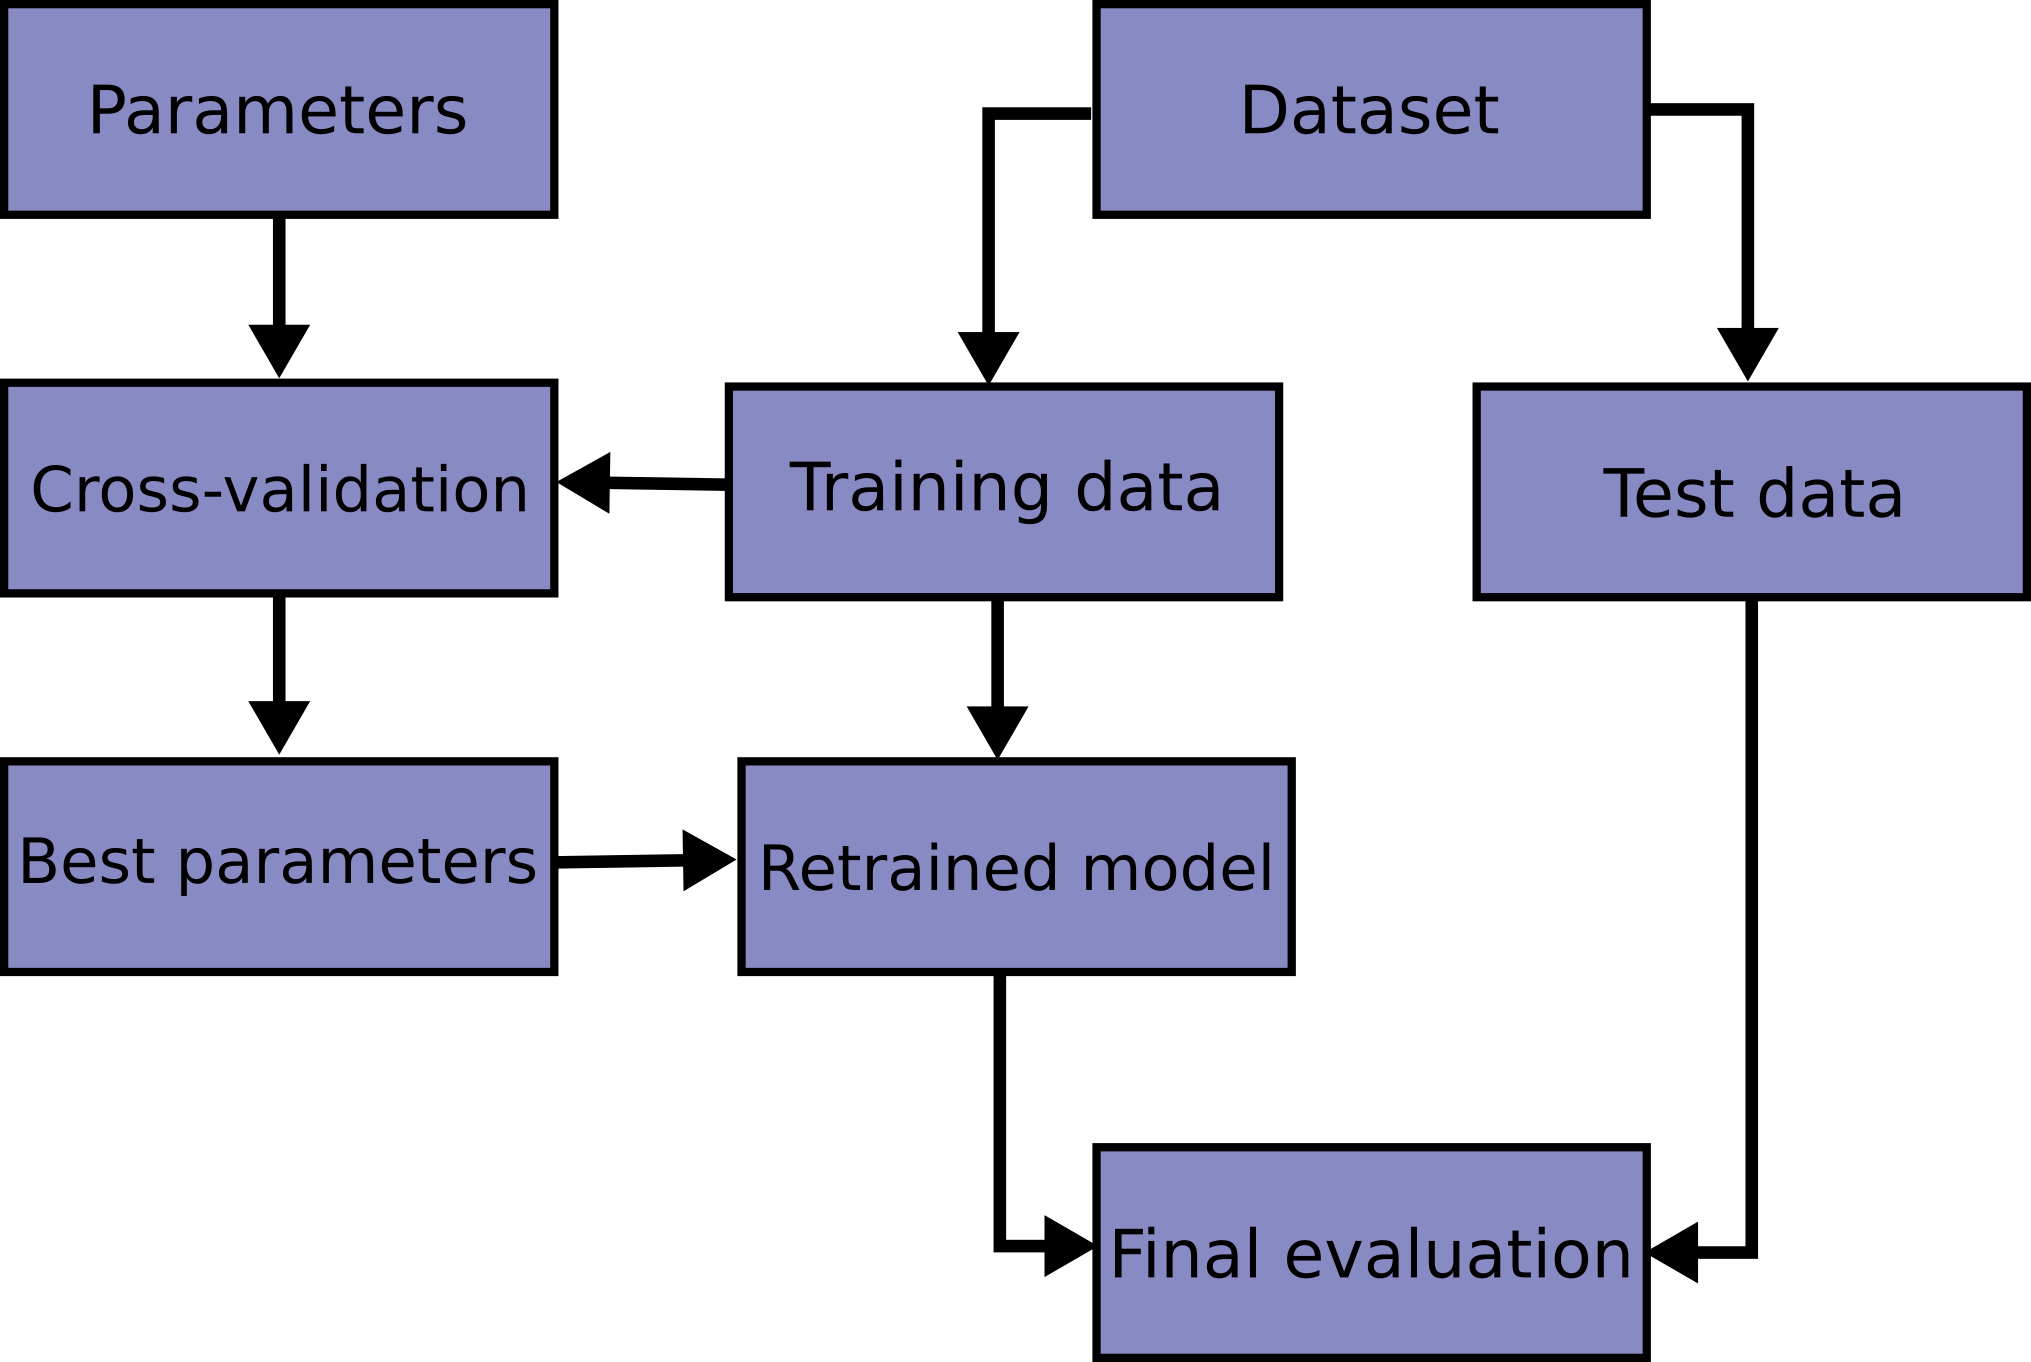

In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function. Let’s load the iris data set to fit a linear support vector machine on it:

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [2]:
X, y = datasets.load_iris(return_X_y=True)

In [3]:
X.shape, y.shape

((150, 4), (150,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [5]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [6]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [7]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [8]:
clf.score(X_test, y_test)

0.9666666666666667

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

A model is trained using 
 of the folds as training data;

the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

In [9]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [10]:
scores = cross_val_score(clf, X, y, cv=5) #k=5
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [13]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.98 accuracy with a standard deviation of 0.02


In [15]:
from sklearn import metrics
scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

In [16]:
from sklearn.model_selection import ShuffleSplit

In [17]:
n_samples = X.shape[0]

In [18]:
n_samples

150

In [19]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [21]:
cv

ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None)

In [22]:
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

In [33]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        # print(idx)
        yield idx, idx
        i += 1


In [ ]:
custom_cv = custom_cv_2folds(X)

In [35]:
next(iter(custom_cv))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]))

In [36]:
next(iter(custom_cv))

(array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149]),
 array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149]))

In [26]:
cross_val_score(clf, X, y, cv=custom_cv)

array([1.        , 0.97333333])

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)

In [38]:
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [42]:
scores['test_recall_macro']


KeyError: 'test_recall_macro'

In [41]:
scores = cross_validate(clf, X, y,
                        scoring='precision_macro', cv=5,
                        return_estimator=True)

In [43]:
sorted(scores.keys())

['estimator', 'fit_time', 'score_time', 'test_score']

In [44]:
import numpy as np
from sklearn.model_selection import KFold

In [45]:
X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


KFold divides all the samples in k
 groups of samples, called folds (if k=n
, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using k-1
 folds, and the fold left out is used for test.

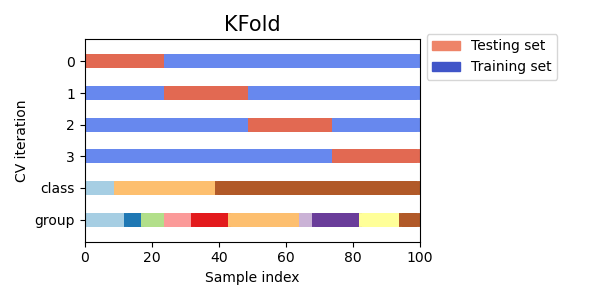

In [46]:
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 0, 1])
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

In [47]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))


In [ ]:
np.hstack(([0] * 45, [1] * 5)) #y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1])

In [48]:
X

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [51]:
skf = StratifiedKFold(n_splits=3)

In [52]:
skf

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [53]:
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]


In [54]:
kf = KFold(n_splits=3)

In [55]:
for train, test in kf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


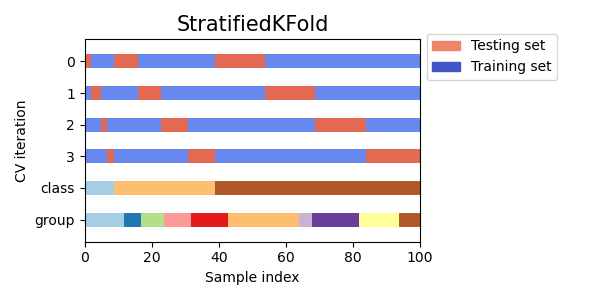

Hyper-parameters

 are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

In [56]:
estimator.get_params()

NameError: name 'estimator' is not defined

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid:

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

specifies that two grids should be explored: one with a linear kernel and C values in [1, 10, 100, 1000], and the second one with an RBF kernel, and the cross-product of C values ranging in [1, 10, 100, 1000] and gamma values in [0.001, 0.0001].

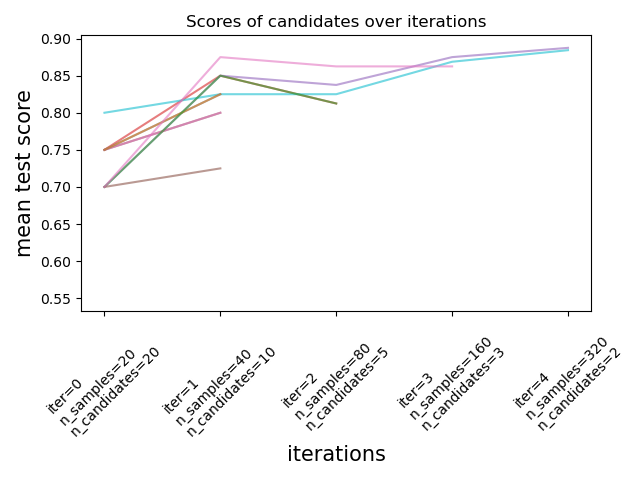

GridSearchCV and RandomizedSearchCV allow searching over parameters of composite or nested estimators such as Pipeline, ColumnTransformer, VotingClassifier or CalibratedClassifierCV using a dedicated <estimator>__<parameter> syntax:

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons


In [58]:
X, y = make_moons()

In [60]:
X[:5]

array([[ 0.01844084,  0.30884137],
       [-0.09602303,  0.99537911],
       [-0.6234898 ,  0.78183148],
       [ 0.32769911, -0.240278  ],
       [-0.80141362,  0.59811053]])

In [62]:
y[:5]

array([1, 0, 0, 1, 0])

In [63]:
calibrated_forest = CalibratedClassifierCV(estimator=RandomForestClassifier(n_estimators=10))

In [64]:
param_grid = {'estimator__max_depth': [2, 4, 6, 8]}

In [65]:
search = GridSearchCV(calibrated_forest, param_grid, cv=5)

In [66]:
search.fit(X, y)

GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(estimator=RandomForestClassifier(n_estimators=10)),
             param_grid={'estimator__max_depth': [2, 4, 6, 8]})

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [70]:
pipe = Pipeline([
   ('select', SelectKBest()),
   ('model', calibrated_forest)])

In [68]:
param_grid = {
   'select__k': [1, 2],
   'model__estimator__max_depth': [2, 4, 6, 8]}

In [71]:
search = GridSearchCV(pipe, param_grid, cv=5) # cv for cross validation 5

In [72]:
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select', SelectKBest()),
                                       ('model',
                                        CalibratedClassifierCV(estimator=RandomForestClassifier(n_estimators=10)))]),
             param_grid={'model__estimator__max_depth': [2, 4, 6, 8],
                         'select__k': [1, 2]})

In [73]:
search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select', SelectKBest()),
                                       ('model',
                                        CalibratedClassifierCV(estimator=RandomForestClassifier(n_estimators=10)))]),
             param_grid={'model__estimator__max_depth': [2, 4, 6, 8],
                         'select__k': [1, 2]})

 Tuning the decision threshold for class prediction

In [74]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [75]:
X, y = make_classification(random_state=0)

In [76]:
X[:5]

array([[-0.03926799,  0.13191176, -0.21120598, -1.2141474 ,  1.05004467,
        -0.42132759,  0.76877064,  0.87569568,  2.45122972, -0.48024204,
        -2.13264106, -0.52325094,  0.70869527, -1.98056559, -1.36516288,
        -0.94893281,  1.94709864,  1.97698901,  1.02122474, -0.46931074],
       [ 0.77416061,  0.10490717, -0.33281176, -1.27034986,  0.37911283,
        -0.82282832, -0.61262574,  1.49613964,  0.56845892, -0.46749317,
        -1.80170793, -0.8624933 , -0.63119194,  0.13391292, -0.97240289,
        -0.77445897,  1.34622107,  1.2678044 ,  0.62251914, -1.49026539],
       [-0.0148577 ,  0.67057045, -0.21416666,  0.25020227,  0.05548937,
        -1.56699471,  0.03976673,  0.26568797,  1.84959125,  0.71998373,
         0.27713603, -1.10290621,  0.01927938, -0.7075057 ,  0.72310049,
         0.82140594,  0.02461213, -0.10486202, -0.10169727, -0.45130304],
       [ 0.03890871, -1.55799853, -0.02454942,  0.21654345,  0.06527398,
        -0.67559383,  0.8449956 ,  2.04207215, -

In [77]:
y[:5]

array([0, 0, 1, 1, 1])

In [78]:
classifier = DecisionTreeClassifier(max_depth=2, random_state=0).fit(X, y)

In [79]:
classifier

DecisionTreeClassifier(max_depth=2, random_state=0)

In [80]:
classifier.predict_proba(X[:4])

array([[0.94      , 0.06      ],
       [0.94      , 0.06      ],
       [0.04166667, 0.95833333],
       [0.04166667, 0.95833333]])

In [81]:
classifier.predict(X[:4])

array([0, 0, 1, 1])

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer, f1_score

In [83]:
X, y = make_classification(
  n_samples=1_000, weights=[0.1, 0.9], random_state=0)

In [84]:
pos_label = 0

In [86]:
scorer = make_scorer(f1_score, pos_label=pos_label)

In [85]:
base_model = LogisticRegression()

In [87]:
model = TunedThresholdClassifierCV(base_model, scoring=scorer)

In [88]:
scorer(model.fit(X, y), X, y)

np.float64(0.8867924528301887)

In [89]:
# compare it with the internal score found by cross-validation
model.best_score_

np.float64(0.8622906877990765)

In [90]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
X, y = datasets.load_iris(return_X_y=True)

In [91]:
clf = svm.SVC(random_state=0)

In [ ]:
cross_val_score(clf, X, y, cv=5, scoring='recall_macro') # for 5 cross validation

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [93]:
from sklearn.metrics import fbeta_score, make_scorer

In [94]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [95]:
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
                    scoring=ftwo_scorer, cv=5)

In [96]:
scoring = ['accuracy', 'precision']

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),
           'prec': 'precision'}

In [98]:
scoring

{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'prec': 'precision'}

In [99]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
# A sample toy binary classification dataset
X, y = datasets.make_classification(n_classes=2, random_state=0)

In [100]:
svm = LinearSVC(random_state=0)

In [101]:
def confusion_matrix_scorer(clf, X, y):
     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

In [102]:
cv_results = cross_validate(svm, X, y, cv=5,
                            scoring=confusion_matrix_scorer)

In [ ]:
cv_results # for 5 cross validation

{'fit_time': array([0.30297685, 0.00194645, 0.00100064, 0.00104928, 0.00217247]),
 'score_time': array([0.01657176, 0.00099945, 0.00200891, 0.00249743, 0.00104547]),
 'test_tn': array([ 5,  9,  8,  6, 10]),
 'test_fp': array([5, 1, 2, 4, 0]),
 'test_fn': array([0, 1, 2, 3, 2]),
 'test_tp': array([10,  9,  8,  7,  8])}

In [ ]:
# Getting the test set true positive scores
print(cv_results['test_tp']) # for 5 cross validation


[10  9  8  7  8]


In [ ]:
# Getting the test set false negative scores
print(cv_results['test_fn']) # for 5 cross validation

[0 1 2 3 2]


Accuracy score

If yi
 is the predicted value of the ith
-th sample and yi
 is the corresponding true value, then the fraction of correct predictions over n samples
 is defined as
 <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext mathvariant="monospace">accuracy</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>n</mi>
      <mtext>samples</mtext>
    </msub>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>n</mi>
        <mtext>samples</mtext>
      </msub>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </munderover>
  <mn>1</mn>
  <mo stretchy="false">(</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mo>=</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math>

In [106]:
import numpy as np
from sklearn.metrics import accuracy_score

In [107]:
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

In [108]:
accuracy_score(y_true, y_pred)

0.5

In [109]:
accuracy_score(y_true, y_pred, normalize=False)

2.0

In [110]:
import numpy as np
from sklearn.metrics import top_k_accuracy_score
y_true = np.array([0, 1, 2, 2])
y_score = np.array([[0.5, 0.2, 0.2],
                    [0.3, 0.4, 0.2],
                    [0.2, 0.4, 0.3],
                    [0.7, 0.2, 0.1]])

In [111]:
top_k_accuracy_score(y_true, y_score, k=2)

np.float64(0.75)

In [112]:
# Not normalizing gives the number of "correctly" classified samples
top_k_accuracy_score(y_true, y_score, k=2, normalize=False)

np.int64(3)

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext mathvariant="monospace">balanced-accuracy</mtext>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mn>2</mn>
  </mfrac>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mfrac>
      <mrow>
        <mi>T</mi>
        <mi>P</mi>
      </mrow>
      <mrow>
        <mi>T</mi>
        <mi>P</mi>
        <mo>+</mo>
        <mi>F</mi>
        <mi>N</mi>
      </mrow>
    </mfrac>
    <mo>+</mo>
    <mfrac>
      <mrow>
        <mi>T</mi>
        <mi>N</mi>
      </mrow>
      <mrow>
        <mi>T</mi>
        <mi>N</mi>
        <mo>+</mo>
        <mi>F</mi>
        <mi>P</mi>
      </mrow>
    </mfrac>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>

In [113]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [ ]:
confusion_matrix(y_true, y_pred) # for 3 classes

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [115]:
y_true = [2, 0, 2, 2, 0, 1,3]
y_pred = [0, 0, 2, 2, 0, 2,3]

In [ ]:
confusion_matrix(y_true, y_pred) # for 4 classes

array([[2, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 2, 0],
       [0, 0, 0, 1]])

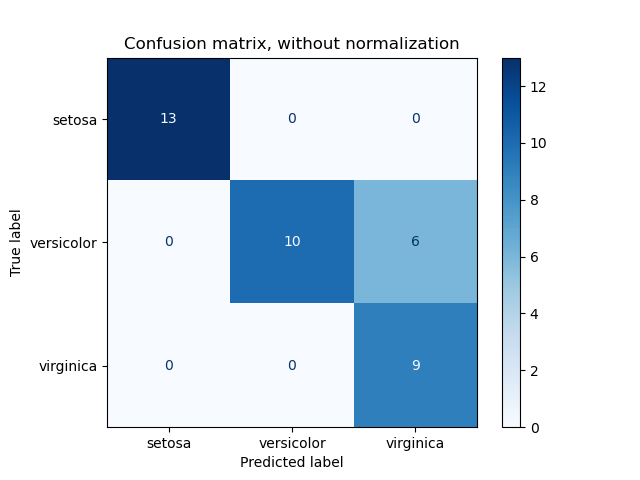

In [117]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
confusion_matrix(y_true, y_pred, normalize='all')

array([[0.25 , 0.125],
       [0.25 , 0.375]])

In [118]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(np.int64(2), np.int64(1), np.int64(2), np.int64(3))

In [ ]:
confusion_matrix(y_true, y_pred) # for 2 cclasses

array([[2, 1],
       [2, 3]])

Classification report

In [120]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']

In [121]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>precision</mtext>
  <mo>=</mo>
  <mfrac>
    <mtext>tp</mtext>
    <mrow>
      <mtext>tp</mtext>
      <mo>+</mo>
      <mtext>fp</mtext>
    </mrow>
  </mfrac>
  <mo>,</mo>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>precision</mtext>
  <mo>=</mo>
  <mfrac>
    <mtext>tp</mtext>
    <mrow>
      <mtext>tp</mtext>
      <mo>+</mo>
      <mtext>fp</mtext>
    </mrow>
  </mfrac>
  <mo>,</mo>
</math>

(Sometimes recall is also called ‘’sensitivity’’)

In [122]:
from sklearn import metrics
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
metrics.precision_score(y_true, y_pred)

metrics.recall_score(y_true, y_pred)

metrics.f1_score(y_true, y_pred)

metrics.fbeta_score(y_true, y_pred, beta=0.5)

metrics.fbeta_score(y_true, y_pred, beta=1)

metrics.fbeta_score(y_true, y_pred, beta=2)

np.float64(0.5555555555555556)

f1_score =precision*recall/(precision+recall)

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>F</mi>
    <mi>&#x3B2;</mi>
  </msub>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>+</mo>
  <msup>
    <mi>&#x3B2;</mi>
    <mn>2</mn>
  </msup>
  <mo stretchy="false">)</mo>
  <mfrac>
    <mrow>
      <mtext>precision</mtext>
      <mo>&#xD7;</mo>
      <mtext>recall</mtext>
    </mrow>
    <mrow>
      <msup>
        <mi>&#x3B2;</mi>
        <mn>2</mn>
      </msup>
      <mtext>precision</mtext>
      <mo>+</mo>
      <mtext>recall</mtext>
    </mrow>
  </mfrac>
</math>

In [123]:
metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5)

(array([0.66666667, 1.        ]),
 array([1. , 0.5]),
 array([0.71428571, 0.83333333]),
 array([2, 2]))

In [124]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, threshold = precision_recall_curve(y_true, y_scores)
precision

array([0.5       , 0.66666667, 0.5       , 1.        , 1.        ])

In [125]:
recall

array([1. , 1. , 0.5, 0.5, 0. ])

In [126]:
threshold

array([0.1 , 0.35, 0.4 , 0.8 ])

In [127]:
average_precision_score(y_true, y_scores)

np.float64(0.8333333333333333)

####  Jaccard similarity coefficient score

 Jaccard similarity coefficient score

The Jaccard similarity coefficient with a ground truth label set y
 and predicted label set y^
, is defined as
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>J</mi>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mo stretchy="false">|</mo>
      <mi>y</mi>
      <mo>&#x2229;</mo>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>y</mi>
          <mo stretchy="false">^</mo>
        </mover>
      </mrow>
      <mo stretchy="false">|</mo>
    </mrow>
    <mrow>
      <mo stretchy="false">|</mo>
      <mi>y</mi>
      <mo>&#x222A;</mo>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>y</mi>
          <mo stretchy="false">^</mo>
        </mover>
      </mrow>
      <mo stretchy="false">|</mo>
    </mrow>
  </mfrac>
  <mo>.</mo>
</math>

In [128]:
import numpy as np
from sklearn.metrics import jaccard_score
y_true = np.array([[0, 1, 1],
                   [1, 1, 0]])
y_pred = np.array([[1, 1, 1],
                   [1, 0, 0]])

In [130]:
y_true[0]

array([0, 1, 1])

In [129]:
jaccard_score(y_true[0], y_pred[0])

np.float64(0.6666666666666666)

In [131]:
jaccard_score(y_true, y_pred, average="micro")

np.float64(0.6)

In [132]:
y_pred = [0, 2, 1, 2]
y_true = [0, 1, 2, 2]
jaccard_score(y_true, y_pred, average=None)


array([1.        , 0.        , 0.33333333])

In [133]:
from sklearn import svm
from sklearn.metrics import hinge_loss
X = [[0], [1]]
y = [-1, 1]
est = svm.LinearSVC(random_state=0)
est.fit(X, y)
LinearSVC(random_state=0)
pred_decision = est.decision_function([[-2], [3], [0.5]])
pred_decision

hinge_loss([-1, 1, 1], pred_decision)

np.float64(0.30303030303030304)

#### Log loss

Log loss, also called logistic regression loss or cross-entropy loss, is defined on probability estimates. It is commonly used in (multinomial) logistic regression and neural networks, as well as in some variants of expectation-maximization, and can be used to evaluate the probability outputs (predict_proba) of a classifier instead of its discrete predictions.

For binary classification with a true label <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>&#x2208;</mo>
  <mo fence="false" stretchy="false">{</mo>
  <mn>0</mn>
  <mo>,</mo>
  <mn>1</mn>
  <mo fence="false" stretchy="false">}</mo>
</math>
 and a probability estimate <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>p</mi>
  <mo>=</mo>
  <mi>Pr</mi>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
</math>
, the log loss per sample is the negative log-likelihood of the classifier given the true label:
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>L</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>log</mi>
    </mrow>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mi>p</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mi>Pr</mi>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>p</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mi>p</mi>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>p</mi>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
</math>


In [ ]:
from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]] # for 2 classes probability
log_loss(y_true, y_pred)

0.1738073366910675

The first [.9, .1] in y_pred denotes 90% probability that the first sample has label 0. The log loss is non-negative.

In [2]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
y_true = np.array([[1, 0, 1],
                   [0, 1, 0]])
y_pred = np.array([[1, 0, 0],
                   [0, 1, 1]])
multilabel_confusion_matrix(y_true, y_pred)


array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[0, 1],
        [1, 0]]])

In [3]:
multilabel_confusion_matrix(y_true, y_pred, samplewise=True)

array([[[1, 0],
        [1, 1]],

       [[1, 1],
        [0, 1]]])

In [4]:
y_true = np.array([[0, 0, 1],
                   [0, 1, 0],
                   [1, 1, 0]])
y_pred = np.array([[0, 1, 0],
                   [0, 0, 1],
                   [1, 1, 0]])
mcm = multilabel_confusion_matrix(y_true, y_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
tp / (tp + fn) # recall
# tp / (tp + fp) # precision

array([1. , 0.5, 0. ])

Receiver operating characteristic (ROC)

“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.”

In [5]:
import numpy as np
from sklearn.metrics import roc_curve
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
fpr

array([0. , 0. , 0.5, 0.5, 1. ])

In [6]:
tpr

array([0. , 0.5, 0.5, 1. , 1. ])

In [7]:
thresholds

array([ inf, 0.8 , 0.4 , 0.35, 0.1 ])

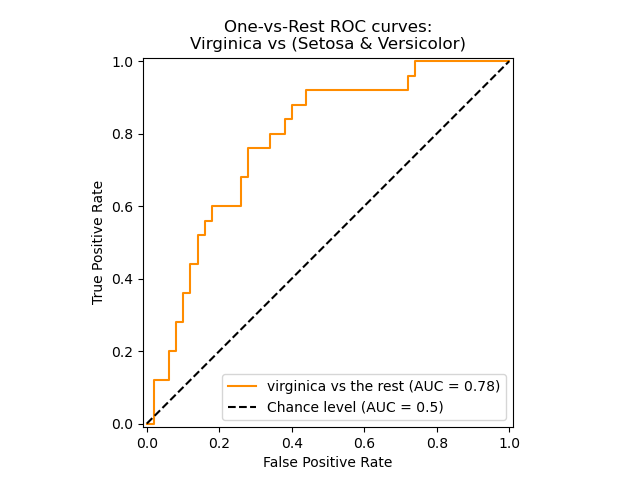

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
clf.classes_

array([0, 1])

In [ ]:
y_score = clf.predict_proba(X)[:, 1]
roc_auc_score(y, y_score)

np.float64(0.9947412927435125)

In [ ]:
clf.predict_proba(X)

array([[1.00000000e+00, 3.72001261e-15],
       [9.99999978e-01, 2.17076891e-08],
       [9.99999954e-01, 4.61801193e-08],
       ...,
       [9.98032007e-01, 1.96799306e-03],
       [1.00000000e+00, 8.51366809e-11],
       [3.67947864e-02, 9.63205214e-01]])

In [17]:
clf.predict_proba(X)[:5]

array([[1.00000000e+00, 3.72001261e-15],
       [9.99999978e-01, 2.17076891e-08],
       [9.99999954e-01, 4.61801193e-08],
       [4.80467610e-01, 5.19532390e-01],
       [9.99990658e-01, 9.34245265e-06]])

In [15]:
clf.predict_proba(X)[:5,1]

array([3.72001261e-15, 2.17076891e-08, 4.61801193e-08, 5.19532390e-01,
       9.34245265e-06])

In [10]:
y_score

array([3.72001261e-15, 2.17076891e-08, 4.61801193e-08, 5.19532390e-01,
       9.34245265e-06, 2.04431369e-01, 9.85160640e-07, 1.85093261e-02,
       9.44613387e-02, 3.28737545e-03, 2.48739209e-03, 1.54361767e-05,
       1.18515038e-05, 7.18155961e-01, 2.12252240e-01, 7.12436939e-04,
       3.92712273e-04, 9.67964572e-06, 2.42729065e-16, 9.76715674e-01,
       9.94362825e-01, 9.99671088e-01, 3.58164577e-02, 1.64991469e-16,
       5.00085258e-16, 6.36133003e-08, 2.11364731e-02, 1.89869215e-05,
       4.25836523e-07, 6.24420291e-03, 3.47074627e-10, 1.89159761e-04,
       7.94892023e-06, 2.43293538e-09, 2.18276191e-04, 4.32185364e-04,
       1.10154936e-01, 9.99919585e-01, 6.18632102e-01, 5.91861657e-01,
       4.91838049e-01, 4.31161200e-01, 3.90013997e-10, 2.23469990e-02,
       6.28127445e-01, 1.97010393e-06, 9.98088021e-01, 2.77608062e-01,
       9.80711868e-01, 8.65664687e-01, 9.90223517e-01, 9.95680106e-01,
       9.97527744e-01, 6.68342475e-05, 1.52767005e-02, 9.94717217e-01,
      

In [18]:
roc_auc_score(y, clf.decision_function(X))

np.float64(0.9947412927435125)

In [19]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
X, y = make_multilabel_classification(random_state=0)
inner_clf = LogisticRegression(solver="liblinear", random_state=0)
clf = MultiOutputClassifier(inner_clf).fit(X, y)
y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
roc_auc_score(y, y_score, average=None)

array([0.82664884, 0.86034414, 0.94181818, 0.8502652 , 0.94809095])

In [20]:
from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV().fit(X, y)
y_score = clf.decision_function(X)
roc_auc_score(y, y_score, average=None)

array([0.81996435, 0.8467387 , 0.93090909, 0.87229702, 0.94422994])

Mean absolute error

The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or 
-norm loss.

If 
 is the predicted value of the 
-th sample, and 
 is the corresponding true value, then the mean absolute error (MAE) estimated over 
 is defined as
 <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>MAE</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>n</mi>
      <mrow data-mjx-texclass="ORD">
        <mtext>samples</mtext>
      </mrow>
    </msub>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>n</mi>
        <mrow data-mjx-texclass="ORD">
          <mtext>samples</mtext>
        </mrow>
      </msub>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </munderover>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">|</mo>
    <msub>
      <mi>y</mi>
      <mi>i</mi>
    </msub>
    <mo>&#x2212;</mo>
    <msub>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>y</mi>
          <mo stretchy="false">^</mo>
        </mover>
      </mrow>
      <mi>i</mi>
    </msub>
    <mo data-mjx-texclass="CLOSE">|</mo>
  </mrow>
  <mo>.</mo>
</math>

 
 


In [21]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

np.float64(0.5)

In [22]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_absolute_error(y_true, y_pred)

np.float64(0.75)

In [23]:
mean_absolute_error(y_true, y_pred, multioutput='raw_values')

array([0.5, 1. ])

In [24]:
mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])

np.float64(0.85)

Mean squared error

The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

If 
 is the predicted value of the 
-th sample, and 
 is the corresponding true value, then the mean squared error (MSE) estimated over 
 is defined as
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>MSE</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>n</mi>
      <mtext>samples</mtext>
    </msub>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>n</mi>
        <mtext>samples</mtext>
      </msub>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </munderover>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
  <mo>.</mo>
</math>
 
 


In [25]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

np.float64(0.375)

In [26]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_squared_error(y_true, y_pred)

np.float64(0.7083333333333334)

Mean squared logarithmic error

The mean_squared_log_error function computes a risk metric corresponding to the expected value of the squared logarithmic (quadratic) error or loss.

If 
 is the predicted value of the 
-th sample, and 
 is the corresponding true value, then the mean squared logarithmic error (MSLE) estimated over 
 is defined as

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>MSLE</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>n</mi>
      <mtext>samples</mtext>
    </msub>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>n</mi>
        <mtext>samples</mtext>
      </msub>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </munderover>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>log</mi>
    <mi>e</mi>
  </msub>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>+</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>&#x2212;</mo>
  <msub>
    <mi>log</mi>
    <mi>e</mi>
  </msub>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>+</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mo stretchy="false">)</mo>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
  <mo>.</mo>
</math>


 
 
Where 
 means the natural logarithm of 
. This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc. Note that this metric penalizes an under-predicted estimate greater than an over-predicted estimate.

In [27]:
from sklearn.metrics import mean_squared_log_error
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]
mean_squared_log_error(y_true, y_pred)

np.float64(0.03973012298459379)

In [28]:
y_true = [[0.5, 1], [1, 2], [7, 6]]
y_pred = [[0.5, 2], [1, 2.5], [8, 8]]
mean_squared_log_error(y_true, y_pred)

np.float64(0.044199361889160536)

Mean absolute percentage error

The mean_absolute_percentage_error (MAPE), also known as mean absolute percentage deviation (MAPD), is an evaluation metric for regression problems. The idea of this metric is to be sensitive to relative errors. It is for example not changed by a global scaling of the target variable.

If 
 is the predicted value of the 
-th sample and 
 is the corresponding true value, then the mean absolute percentage error (MAPE) estimated over 
 is defined as

 
 <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>MAPE</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>n</mi>
      <mrow data-mjx-texclass="ORD">
        <mtext>samples</mtext>
      </mrow>
    </msub>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>n</mi>
        <mrow data-mjx-texclass="ORD">
          <mtext>samples</mtext>
        </mrow>
      </msub>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </munderover>
  <mfrac>
    <mrow>
      <mrow data-mjx-texclass="ORD"></mrow>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">|</mo>
        <msub>
          <mi>y</mi>
          <mi>i</mi>
        </msub>
        <mo>&#x2212;</mo>
        <msub>
          <mrow data-mjx-texclass="ORD">
            <mover>
              <mi>y</mi>
              <mo stretchy="false">^</mo>
            </mover>
          </mrow>
          <mi>i</mi>
        </msub>
        <mo data-mjx-texclass="CLOSE">|</mo>
      </mrow>
    </mrow>
    <mrow>
      <mo data-mjx-texclass="OP" movablelimits="true">max</mo>
      <mo stretchy="false">(</mo>
      <mi>&#x3F5;</mi>
      <mo>,</mo>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">|</mo>
        <msub>
          <mi>y</mi>
          <mi>i</mi>
        </msub>
        <mo data-mjx-texclass="CLOSE">|</mo>
      </mrow>
      <mo stretchy="false">)</mo>
    </mrow>
  </mfrac>
</math>
where E
 is an arbitrary small yet strictly positive number to avoid undefined results when y is zero.

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = [1, 10, 1e6]
y_pred = [0.9, 15, 1.2e6]
mean_absolute_percentage_error(y_true, y_pred)

np.float64(0.26666666666666666)

In above example, if we had used mean_absolute_error, it would have ignored the small magnitude values and only reflected the error in prediction of highest magnitude value. But that problem is resolved in case of MAPE because it calculates relative percentage error with respect to actual output.

Median absolute error

The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.

If 
 is the predicted value of the 
-th sample and 
 is the corresponding true value, then the median absolute error (MedAE) estimated over 
 is defined as



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>MedAE</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mtext>median</mtext>
  <mo stretchy="false">(</mo>
  <mo>&#x2223;</mo>
  <msub>
    <mi>y</mi>
    <mn>1</mn>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mn>1</mn>
  </msub>
  <mo>&#x2223;</mo>
  <mo>,</mo>
  <mo>&#x2026;</mo>
  <mo>,</mo>
  <mo>&#x2223;</mo>
  <msub>
    <mi>y</mi>
    <mi>n</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>n</mi>
  </msub>
  <mo>&#x2223;</mo>
  <mo stretchy="false">)</mo>
  <mo>.</mo>
</math>

In [31]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

np.float64(0.5)

 Max error

The max_error function computes the maximum residual error , a metric that captures the worst case error between the predicted value and the true value. In a perfectly fitted single output regression model, max_error would be 0 on the training set and though this would be highly unlikely in the real world, this metric shows the extent of error that the model had when it was fitted.

If 
 is the predicted value of the 
-th sample, and 
 is the corresponding true value, then the max error is defined as



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Max Error</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mo data-mjx-texclass="OP" movablelimits="true">max</mo>
  <mo stretchy="false">(</mo>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mo stretchy="false">)</mo>
</math>

In [33]:
from sklearn.metrics import max_error
y_true = [3, 2, 7, 1]
y_pred = [9, 2, 7, 1]
max_error(y_true, y_pred)

np.int64(6)

Explained variance score

The explained_variance_score computes the explained variance regression score.

If 
 is the estimated target output, 
 the corresponding (correct) target output, and 
 is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>e</mi>
  <mi>x</mi>
  <mi>p</mi>
  <mi>l</mi>
  <mi>a</mi>
  <mi>i</mi>
  <mi>n</mi>
  <mi>e</mi>
  <mi>d</mi>
  <mi mathvariant="normal">_</mi>
  <mrow data-mjx-texclass="ORD"></mrow>
  <mi>v</mi>
  <mi>a</mi>
  <mi>r</mi>
  <mi>i</mi>
  <mi>a</mi>
  <mi>n</mi>
  <mi>c</mi>
  <mi>e</mi>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mfrac>
    <mrow>
      <mi>V</mi>
      <mi>a</mi>
      <mi>r</mi>
      <mo fence="false" stretchy="false">{</mo>
      <mi>y</mi>
      <mo>&#x2212;</mo>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>y</mi>
          <mo stretchy="false">^</mo>
        </mover>
      </mrow>
      <mo fence="false" stretchy="false">}</mo>
    </mrow>
    <mrow>
      <mi>V</mi>
      <mi>a</mi>
      <mi>r</mi>
      <mo fence="false" stretchy="false">{</mo>
      <mi>y</mi>
      <mo fence="false" stretchy="false">}</mo>
    </mrow>
  </mfrac>
</math>

In [34]:
from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
explained_variance_score(y_true, y_pred)

0.9571734475374732

In [35]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
explained_variance_score(y_true, y_pred, multioutput='raw_values')

array([0.96774194, 1.        ])

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtable displaystyle="true" columnalign="right" columnspacing="0em" rowspacing="3pt">
    <mtr>
      <mtd>
        <mtext>D</mtext>
        <mo stretchy="false">(</mo>
        <mi>y</mi>
        <mo>,</mo>
        <mrow data-mjx-texclass="ORD">
          <mover>
            <mi>y</mi>
            <mo stretchy="false">^</mo>
          </mover>
        </mrow>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <mfrac>
          <mn>1</mn>
          <msub>
            <mi>n</mi>
            <mtext>samples</mtext>
          </msub>
        </mfrac>
        <munderover>
          <mo data-mjx-texclass="OP">&#x2211;</mo>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
            <mo>=</mo>
            <mn>0</mn>
          </mrow>
          <mrow data-mjx-texclass="ORD">
            <msub>
              <mi>n</mi>
              <mtext>samples</mtext>
            </msub>
            <mo>&#x2212;</mo>
            <mn>1</mn>
          </mrow>
        </munderover>
        <mrow data-mjx-texclass="INNER">
          <mo data-mjx-texclass="OPEN">{</mo>
          <mtable columnalign="left left" columnspacing="1em" rowspacing=".2em">
            <mtr>
              <mtd>
                <mo stretchy="false">(</mo>
                <msub>
                  <mi>y</mi>
                  <mi>i</mi>
                </msub>
                <mo>&#x2212;</mo>
                <msub>
                  <mrow data-mjx-texclass="ORD">
                    <mover>
                      <mi>y</mi>
                      <mo stretchy="false">^</mo>
                    </mover>
                  </mrow>
                  <mi>i</mi>
                </msub>
                <msup>
                  <mo stretchy="false">)</mo>
                  <mn>2</mn>
                </msup>
                <mo>,</mo>
              </mtd>
              <mtd>
                <mtext>for&#xA0;</mtext>
                <mi>p</mi>
                <mo>=</mo>
                <mn>0</mn>
                <mtext>&#xA0;(Normal)</mtext>
              </mtd>
            </mtr>
            <mtr>
              <mtd>
                <mn>2</mn>
                <mo stretchy="false">(</mo>
                <msub>
                  <mi>y</mi>
                  <mi>i</mi>
                </msub>
                <mi>log</mi>
                <mo data-mjx-texclass="NONE">&#x2061;</mo>
                <mo stretchy="false">(</mo>
                <msub>
                  <mi>y</mi>
                  <mi>i</mi>
                </msub>
                <mrow data-mjx-texclass="ORD">
                  <mo>/</mo>
                </mrow>
                <msub>
                  <mrow data-mjx-texclass="ORD">
                    <mover>
                      <mi>y</mi>
                      <mo stretchy="false">^</mo>
                    </mover>
                  </mrow>
                  <mi>i</mi>
                </msub>
                <mo stretchy="false">)</mo>
                <mo>+</mo>
                <msub>
                  <mrow data-mjx-texclass="ORD">
                    <mover>
                      <mi>y</mi>
                      <mo stretchy="false">^</mo>
                    </mover>
                  </mrow>
                  <mi>i</mi>
                </msub>
                <mo>&#x2212;</mo>
                <msub>
                  <mi>y</mi>
                  <mi>i</mi>
                </msub>
                <mo stretchy="false">)</mo>
                <mo>,</mo>
              </mtd>
              <mtd>
                <mtext>for&#xA0;</mtext>
                <mi>p</mi>
                <mo>=</mo>
                <mn>1</mn>
                <mtext>&#xA0;(Poisson)</mtext>
              </mtd>
            </mtr>
            <mtr>
              <mtd>
                <mn>2</mn>
                <mo stretchy="false">(</mo>
                <mi>log</mi>
                <mo data-mjx-texclass="NONE">&#x2061;</mo>
                <mo stretchy="false">(</mo>
                <msub>
                  <mrow data-mjx-texclass="ORD">
                    <mover>
                      <mi>y</mi>
                      <mo stretchy="false">^</mo>
                    </mover>
                  </mrow>
                  <mi>i</mi>
                </msub>
                <mrow data-mjx-texclass="ORD">
                  <mo>/</mo>
                </mrow>
                <msub>
                  <mi>y</mi>
                  <mi>i</mi>
                </msub>
                <mo stretchy="false">)</mo>
                <mo>+</mo>
                <msub>
                  <mi>y</mi>
                  <mi>i</mi>
                </msub>
                <mrow data-mjx-texclass="ORD">
                  <mo>/</mo>
                </mrow>
                <msub>
                  <mrow data-mjx-texclass="ORD">
                    <mover>
                      <mi>y</mi>
                      <mo stretchy="false">^</mo>
                    </mover>
                  </mrow>
                  <mi>i</mi>
                </msub>
                <mo>&#x2212;</mo>
                <mn>1</mn>
                <mo stretchy="false">)</mo>
                <mo>,</mo>
              </mtd>
              <mtd>
                <mtext>for&#xA0;</mtext>
                <mi>p</mi>
                <mo>=</mo>
                <mn>2</mn>
                <mtext>&#xA0;(Gamma)</mtext>
              </mtd>
            </mtr>
            <mtr>
              <mtd>
                <mn>2</mn>
                <mrow data-mjx-texclass="INNER">
                  <mo data-mjx-texclass="OPEN">(</mo>
                  <mfrac>
                    <mrow>
                      <mo data-mjx-texclass="OP" movablelimits="true">max</mo>
                      <mo stretchy="false">(</mo>
                      <msub>
                        <mi>y</mi>
                        <mi>i</mi>
                      </msub>
                      <mo>,</mo>
                      <mn>0</mn>
                      <msup>
                        <mo stretchy="false">)</mo>
                        <mrow data-mjx-texclass="ORD">
                          <mn>2</mn>
                          <mo>&#x2212;</mo>
                          <mi>p</mi>
                        </mrow>
                      </msup>
                    </mrow>
                    <mrow>
                      <mo stretchy="false">(</mo>
                      <mn>1</mn>
                      <mo>&#x2212;</mo>
                      <mi>p</mi>
                      <mo stretchy="false">)</mo>
                      <mo stretchy="false">(</mo>
                      <mn>2</mn>
                      <mo>&#x2212;</mo>
                      <mi>p</mi>
                      <mo stretchy="false">)</mo>
                    </mrow>
                  </mfrac>
                  <mo>&#x2212;</mo>
                  <mfrac>
                    <mrow>
                      <msub>
                        <mi>y</mi>
                        <mi>i</mi>
                      </msub>
                      <mstyle scriptlevel="0">
                        <mspace width="0.167em"></mspace>
                      </mstyle>
                      <msubsup>
                        <mrow data-mjx-texclass="ORD">
                          <mover>
                            <mi>y</mi>
                            <mo stretchy="false">^</mo>
                          </mover>
                        </mrow>
                        <mi>i</mi>
                        <mrow data-mjx-texclass="ORD">
                          <mn>1</mn>
                          <mo>&#x2212;</mo>
                          <mi>p</mi>
                        </mrow>
                      </msubsup>
                    </mrow>
                    <mrow>
                      <mn>1</mn>
                      <mo>&#x2212;</mo>
                      <mi>p</mi>
                    </mrow>
                  </mfrac>
                  <mo>+</mo>
                  <mfrac>
                    <msubsup>
                      <mrow data-mjx-texclass="ORD">
                        <mover>
                          <mi>y</mi>
                          <mo stretchy="false">^</mo>
                        </mover>
                      </mrow>
                      <mi>i</mi>
                      <mrow data-mjx-texclass="ORD">
                        <mn>2</mn>
                        <mo>&#x2212;</mo>
                        <mi>p</mi>
                      </mrow>
                    </msubsup>
                    <mrow>
                      <mn>2</mn>
                      <mo>&#x2212;</mo>
                      <mi>p</mi>
                    </mrow>
                  </mfrac>
                  <mo data-mjx-texclass="CLOSE">)</mo>
                </mrow>
                <mo>,</mo>
              </mtd>
              <mtd>
                <mtext>otherwise</mtext>
              </mtd>
            </mtr>
          </mtable>
          <mo data-mjx-texclass="CLOSE" fence="true" stretchy="true" symmetric="true"></mo>
        </mrow>
      </mtd>
    </mtr>
  </mtable>
</math>

In [36]:

from sklearn.metrics import mean_tweedie_deviance
mean_tweedie_deviance([1.0], [1.5], power=0)


np.float64(0.25)

Validation curve

To validate a model we need a scoring function (see Metrics and scoring: quantifying the quality of predictions), for example accuracy for classifiers. The proper way of choosing multiple hyperparameters of an estimator is of course grid search or similar methods (see Tuning the hyper-parameters of an estimator) that select the hyperparameter with the maximum score on a validation set or multiple validation sets. Note that if we optimize the hyperparameters based on a validation score the validation score is biased and not a good estimate of the generalization any longer. To get a proper estimate of the generalization we have to compute the score on another test set.

In [37]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [38]:
np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

In [39]:

train_scores, valid_scores = validation_curve(
    SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 3),
)

In [40]:
train_scores

array([[0.90833333, 0.94166667, 0.91666667, 0.89166667, 0.925     ],
       [0.9       , 0.925     , 0.93333333, 0.925     , 0.93333333],
       [0.975     , 1.        , 0.98333333, 0.975     , 0.99166667]])

In [41]:
valid_scores

array([[0.9       , 0.9       , 0.9       , 0.96666667, 0.9       ],
       [0.9       , 0.83333333, 0.96666667, 0.96666667, 0.93333333],
       [1.        , 0.93333333, 1.        , 1.        , 0.9       ]])

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)

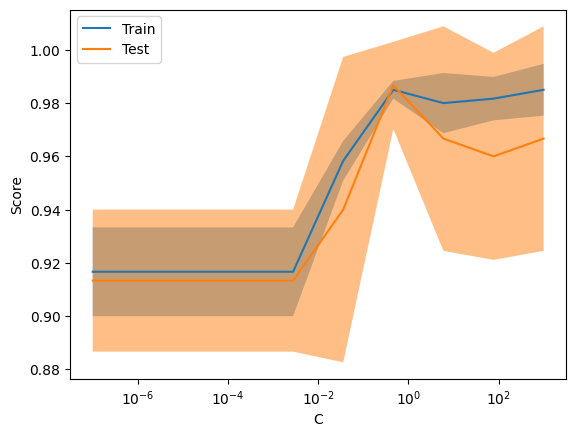

In [43]:
ValidationCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 10)
)

If the training score and the validation score are both low, the estimator will be underfitting. If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well. A low training score and a high validation score is usually not possible. Underfitting, overfitting, and a working model are shown in the in the plot below where we vary the parameter gamma of an SVM with an RBF kernel on the digits dataset

Learning curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. Consider the following example where we plot the learning curve of a naive Bayes classifier and an SVM.

For the naive Bayes, both the validation score and the training score converge to a value that is quite low with increasing size of the training set. Thus, we will probably not benefit much from more training data.

In contrast, for small amounts of data, the training score of the SVM is much greater than the validation score. Adding more training samples will most likely increase generalization.

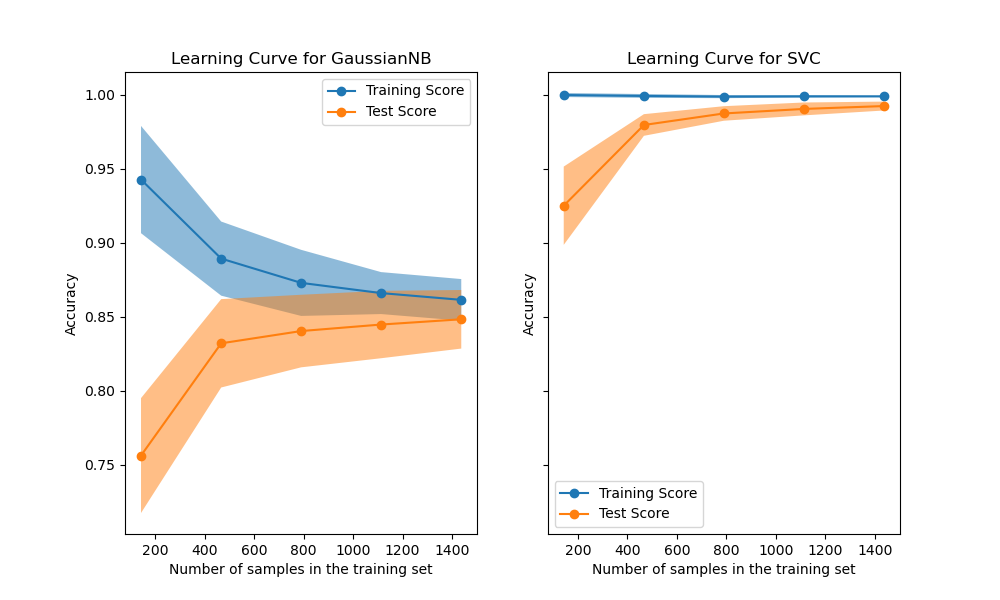

In [44]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)
train_sizes

array([ 50,  80, 110])

In [45]:
train_scores

array([[0.98      , 0.98      , 0.98      , 0.98      , 0.98      ],
       [0.9875    , 1.        , 0.9875    , 0.9875    , 0.9875    ],
       [0.98181818, 1.        , 0.98181818, 0.98181818, 0.99090909]])

In [46]:
valid_scores

array([[1.        , 0.93333333, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667]])

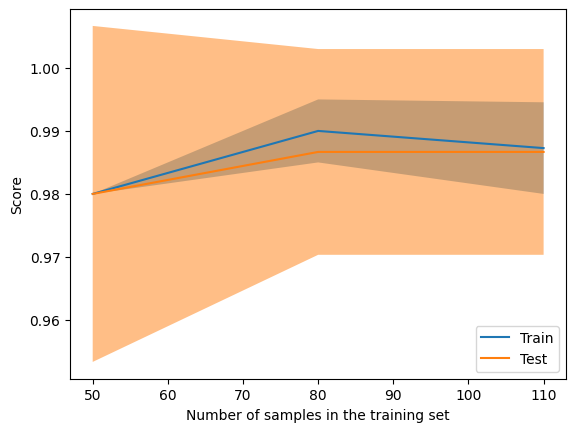

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
LearningCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)

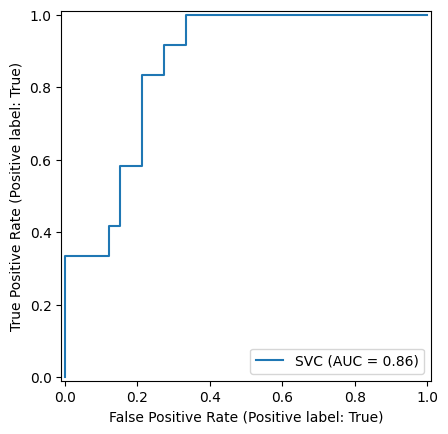

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
y = y == 2  # make binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)

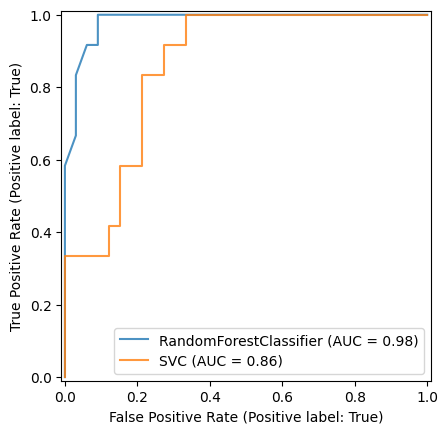

In [49]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)